# Images and Colors

In this notebook, we'll explore how choosing colormaps can affect our perception of images.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,10)
import ipywidgets

In [3]:
arr = np.fromfile("/srv/nbgrader/data/michigan_lld/michigan_lld.flt", dtype="f4")
lmi = arr.reshape((4201, 5365), order="F").transpose()
lake = np.ma.MaskedArray(lmi, mask = (lmi == -9999))

In [4]:
def show_lake_michigan(transform = "linear", cmap = "viridis", diverge = False):
    im1 = lake.copy()
    if diverge:
        v1 = np.abs(im1).max()
        v0 = -v1
    else:
        v0 = im1.min()
        v1 = im1.max()
    im1 = (im1 - v0)/(v1 - v0)
    if transform == "linear":
        im = im1.copy()
    elif transform == "log":
        im = np.log10(im1)
    elif transform == "exp":
        im = np.exp(im1)
    else:
        raise KeyError(transform)
    plt.imshow(im, extent=[-88.0, -88.0 + 0.0008333333333 * 4201, 46.09, 46.09 + 0.0008333333333 * 5365],
          cmap=cmap)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in log10


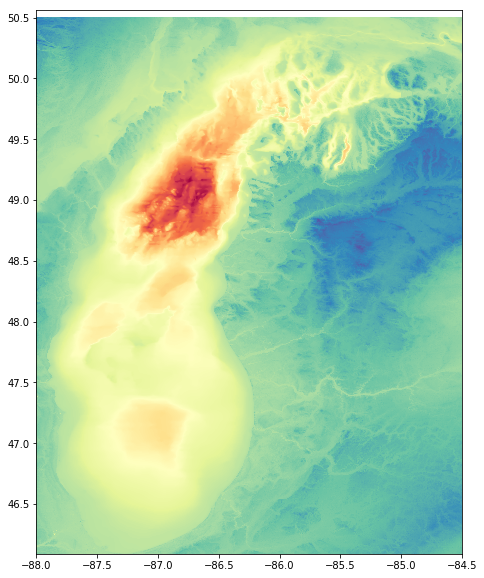

In [6]:
ipywidgets.interact(show_lake_michigan, transform = ["linear", "log", "exp"], cmap = ["gray", "jet", "flag", "gist_stern", "viridis", "RdBu", "Spectral", "magma"])